In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd
import geodatasets
%config inlineBackend.figure_format = 'retina'

In [105]:
pollution_df = pd.read_csv("Data1.csv")
pollution_df['Timestamp'] = pd.to_datetime(pollution_df['Timestamp'])
pollution_df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ncap_funding = pd.read_csv("NCAP_Funding.csv")
ncap_funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [5]:
state_data = pd.read_csv("State_data.csv")
state_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


# Spatial aggregation

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [106]:
state_pm25 = pollution_df.groupby('state')['PM2.5'].mean()

highest_pm25_state = state_pm25.idxmax()
print(f'{highest_pm25_state} has the highest average PM2.5 concentration.')

Delhi has the highest average PM2.5 concentration.


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [234]:
mask_1 = pollution_df['Timestamp'].dt.year == 2023
mask_2 = pollution_df['PM2.5'] > 300

mask = mask_1 & mask_2
df_2023 = pollution_df[mask]

In [235]:
df_2023['Date'] = df_2023['Timestamp'].dt.date

hazardous_days = df_2023.groupby(['state', 'Date']).size().reset_index(name='Count')
hazardous_days_per_state = hazardous_days.groupby('state').size()

most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

print(f'The state with the most days with hazardous PM2.5 levels in 2023 is {most_hazardous_state} with {most_hazardous_days} days.\n')

The state with the most days with hazardous PM2.5 levels in 2023 is Delhi with 49 days.



C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\3159670588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Date'] = df_2023['Timestamp'].dt.date


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [110]:
df_2023 = pollution_df[pollution_df['Timestamp'].dt.year == 2023]

variability_state = df_2023.groupby("state")['PM2.5'].std()
max_variability_state = variability_state.idxmax()

print(f"The state with the highest variability in PM2.5 levels in 2023 is {max_variability_state}")

The state with the highest variability in PM2.5 levels in 2023 is Delhi


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [111]:
mask_1 = pollution_df['Timestamp'].dt.year == 2020
mask_2 = pollution_df['Timestamp'].dt.year == 2021

mask = mask_1 | mask_2
df_covid = pollution_df[mask]

In [112]:
PM_value = df_2023.groupby("state")['PM2.5'].mean()
min_PM_value_state = PM_value.idxmin()

print(f"{min_PM_value_state} has the lowest average PM2.5 levels during the Covid period")

Mizoram has the lowest average PM2.5 levels during the Covid period


# Temporal Aggregation

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [114]:
mask_1 = pollution_df['Timestamp'].dt.year == 2020
mask_2 = pollution_df['Timestamp'].dt.month == 8

mask = mask_1 | mask_2
df_aug_2020 = pollution_df[mask]

In [115]:
highest_value_station = df_aug_2020['PM2.5'].idxmax()
pollution_df.iloc[highest_value_station]

Timestamp              2017-08-29 00:00:00
station      Vikas Sadan, Gurugram - HSPCB
PM2.5                               999.99
PM10                                   NaN
address                                NaN
city                              Gurugram
latitude                         28.450124
longitude                        77.026305
state                              Haryana
Name: 135189, dtype: object

2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [287]:
mask_1 = pollution_df['Timestamp'].dt.year == 2018
mask_2 = pollution_df['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"

mask = mask_1 & mask_2
df_2018_original = pollution_df[mask]
df_2018 = df_2018_original.copy()

In [288]:
seasons = {
    'Winter': [12, 1, 2],
    'Summer': [3, 4, 5],
    'Monsoon': [6, 7, 8, 9]
}

df_2018.loc[:, 'season'] = df_2018['Timestamp'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon'
})

In [289]:
season_avg_pm25 = df_2018.groupby('season')['PM2.5'].mean()
highest_pollution_season = season_avg_pm25.idxmax()

print('The season with the highest PM2.5 pollution in 2018 was:', highest_pollution_season)

The season with the highest PM2.5 pollution in 2018 was: Winter


3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
* Calculate the monthly average PM2.5 for weekdays and weekends separately
* X-axis: Months (January to December).
* Y-axis: Average PM2.5 levels.
* Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

In [295]:
mask_1 = pollution_df['Timestamp'].dt.year == 2021
mask_2 = pollution_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

mask = mask_1 & mask_2
df_2021_original = pollution_df[mask]
df_2021 = df_2021_original.copy()
df_2021.head(1)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
819866,2021-01-01,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,168.421739,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka


In [307]:
df_2021['Timestamp'] = pd.to_datetime(df_2021['Timestamp'])

df_2021['month'] = df_2021['Timestamp'].dt.month
df_2021['day_of_week'] = df_2021['Timestamp'].dt.dayofweek

df_2021['weekend'] = df_2021['day_of_week'] >= 5

monthly_avg_weekday = df_2021[~df_2021['weekend']].groupby('month')['PM2.5'].mean()
monthly_avg_weekend = df_2021[df_2021['weekend']].groupby('month')['PM2.5'].median()

monthly_avg_weekday = monthly_avg_weekday.fillna(df_2021['PM2.5'].mean())
monthly_avg_weekend = monthly_avg_weekend.fillna(df_2021['PM2.5'].median())


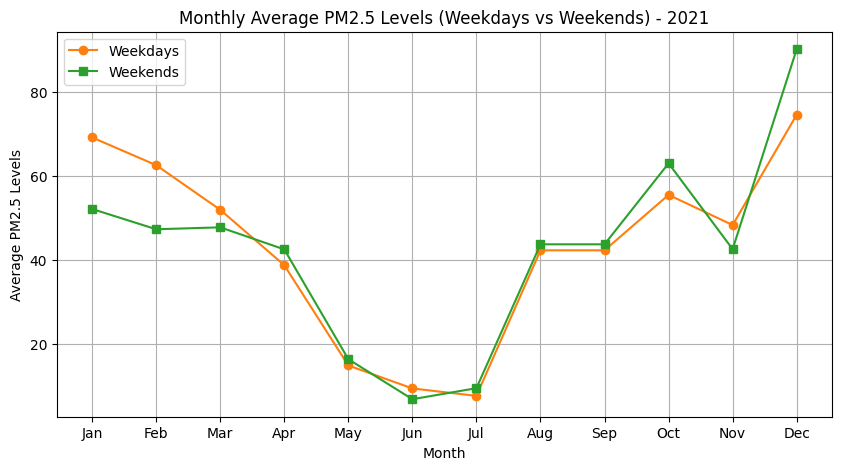

In [309]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_weekday.index, monthly_avg_weekday, marker='o', label='Weekdays', color='C1')
plt.plot(monthly_avg_weekend.index, monthly_avg_weekend, marker='s', label='Weekends', color='C2')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) - 2021')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.grid()
plt.show()

# Spatio-temporal aggregation

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [21]:
def calculate_percentage_change(summer_avg, monsoon_avg):
    return ((monsoon_avg - summer_avg) / summer_avg) * 100

In [171]:
data_2022_original = pollution_df[pollution_df['Timestamp'].dt.year == 2022]
df_2022 = data_2022_original.copy()

summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

pm_25_summer = df_2022[df_2022['Timestamp'].dt.month.isin(summer_months)]
pm_25_monsoon = df_2022[df_2022['Timestamp'].dt.month.isin(monsoon_months)]

average_pm25_summer = pm_25_summer.groupby('state')['PM2.5'].mean()
average_pm25_monsoon = pm_25_monsoon.groupby('state')['PM2.5'].mean()

percentage_change = pd.DataFrame({
    'Summer Avg PM2.5': average_pm25_summer,
    'Monsoon Avg PM2.5': average_pm25_monsoon,
    'Percentage Change': calculate_percentage_change(average_pm25_summer, average_pm25_monsoon)
})

In [97]:
most_difference_state = percentage_change['Percentage Change'].idxmin()
most_difference_value = percentage_change['Percentage Change'].min()

print(f"State with the most significant difference: {most_difference_state} ({most_difference_value:.2f}%)")
percentage_change.head()

State with the most significant difference: Assam (-61.18%)


,Summer Avg PM2.5,Monsoon Avg PM2.5,Percentage Change
state,,,
Andhra Pradesh,30.128540,19.355510,-35.756894
Arunachal Pradesh,32.116292,15.069892,-53.077110
Assam,56.337647,21.872292,-61.176419
Bihar,75.834868,35.642356,-53.000042
Chandigarh,59.695914,32.758585,-45.124242


2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

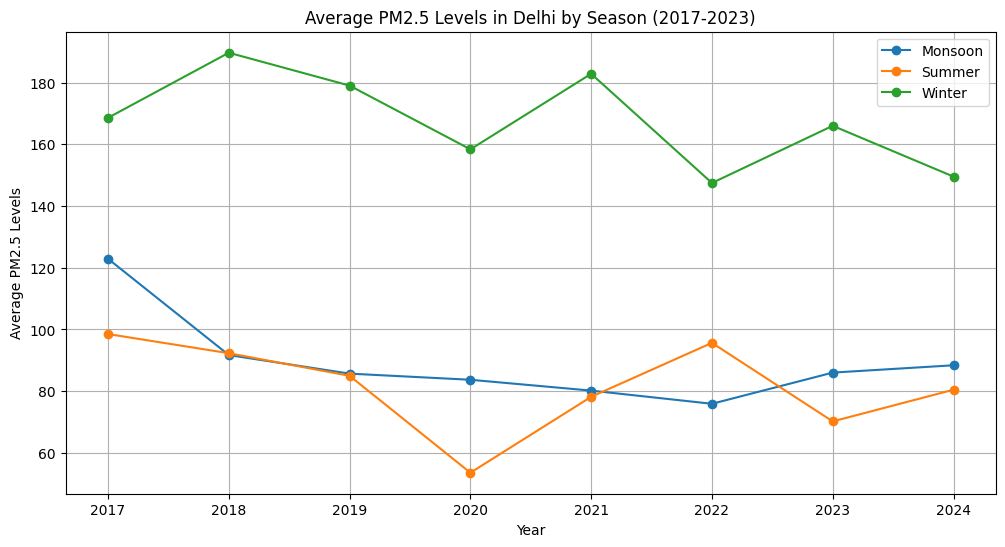

In [362]:
pollution_df['Timestamp'] = pd.to_datetime(pollution_df['Timestamp'], errors='coerce')

delhi_data = pollution_df[pollution_df['city'] == 'Delhi'].copy()

def season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Monsoon'


delhi_data['Season'] = delhi_data['Timestamp'].apply(season)

delhi_seasonal_data = delhi_data[delhi_data['Season'].isin(['Winter', 'Summer', 'Monsoon'])]

delhi_seasonal_avg = delhi_seasonal_data.groupby([delhi_seasonal_data['Timestamp'].dt.year, 'Season'])['PM2.5'].mean().reset_index()
delhi_seasonal_avg.rename(columns={'Timestamp': 'Year'}, inplace=True)

delhi_pivot = delhi_seasonal_avg.pivot(index='Year', columns='Season', values='PM2.5')

plt.figure(figsize=(12, 6))
for season in delhi_pivot.columns:
    plt.plot(delhi_pivot.index, delhi_pivot[season], label=season, marker='o')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('Average PM2.5 Levels in Delhi by Season (2017-2023)')
plt.legend()
plt.grid(True)
plt.show()


3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

In [277]:
mask_1 = pollution_df['city'].isin(['Delhi', 'Mumbai'])
mask_2 = pollution_df['Timestamp'].dt.year.between(2015, 2023)

mask = mask_1 & mask_2
df_cities = pollution_df[mask]

df_cities['Half-Year'] = df_cities['Timestamp'].dt.to_period('8M')
df_cities_avg = df_cities.groupby(['Half-Year', 'city'])['PM2.5'].mean().unstack()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\1820198761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['Half-Year'] = df_cities['Timestamp'].dt.to_period('8M')


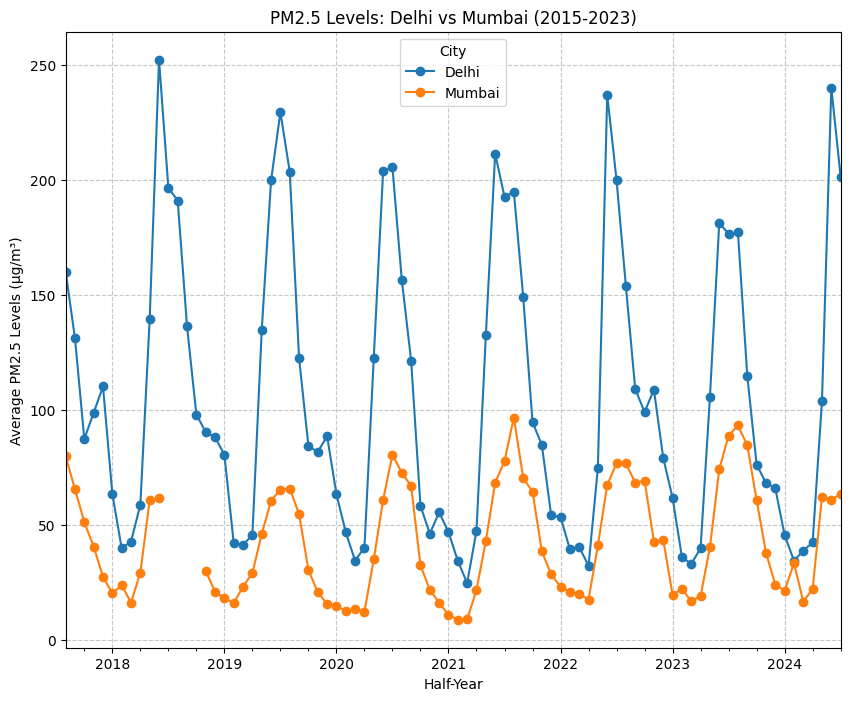

In [274]:
df_cities_avg.plot(kind='line', marker='o', figsize=(10, 8))
plt.xlabel('Half-Year')
plt.ylabel('Average PM2.5 Levels (µg/m³)')
plt.title('PM2.5 Levels: Delhi vs Mumbai (2015-2023)')
plt.legend(title='City')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [276]:
city_fluctuations = df_cities.groupby('city')['PM2.5'].std()
most_fluctuating_city = city_fluctuations.idxmax()

print('The city with the most fluctuations in PM2.5 levels was:', most_fluctuating_city)

The city with the most fluctuations in PM2.5 levels was: Delhi


# Population-Based

1. Which state in India has the highest number of monitoring stations relative to its population? 

In [163]:
station_counts = pollution_df.groupby("state")["station"].nunique().reset_index()
station_counts.columns = ['State', 'Stations']

df_merged = pd.merge(station_counts, state_data, on='State')
df_merged.head()

,State,Stations,Population,Area (km2),Population_Density
0,Andhra Pradesh,13,49577103,162975,304.200663
1,Arunachal Pradesh,1,1383727,83743,16.523495
2,Assam,9,31205576,78438,397.837477
3,Bihar,36,104099452,94163,1105.523953
4,Chandigarh,3,1055450,114,9258.333333


In [164]:
df_merged['Station_per_population'] = df_merged['Stations'] / df_merged['Population']
highest_stations_per_capita_state = df_merged.loc[df_merged['Station_per_population'].idxmax()]
highest_stations_per_capita_state

State                      Chandigarh
Stations                            3
Population                    1055450
Area (km2)                        114
Population_Density        9258.333333
Station_per_population       0.000003
Name: 4, dtype: object

2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

In [165]:
df_2023 = pollution_df[pollution_df['Timestamp'].dt.year == 2023]
df_state_2023 = df_2023.groupby('state')['PM2.5'].sum().reset_index()
df_state_2023.columns = ['State', 'Cumulative_PM2.5']

df_merged = pd.merge(df_state_2023, state_data, on='State')
df_merged['PM2.5_per_Capita'] = df_merged['Cumulative_PM2.5'] / df_merged['Population']

top_5_polluted_states = df_merged.nlargest(5, 'PM2.5_per_Capita')

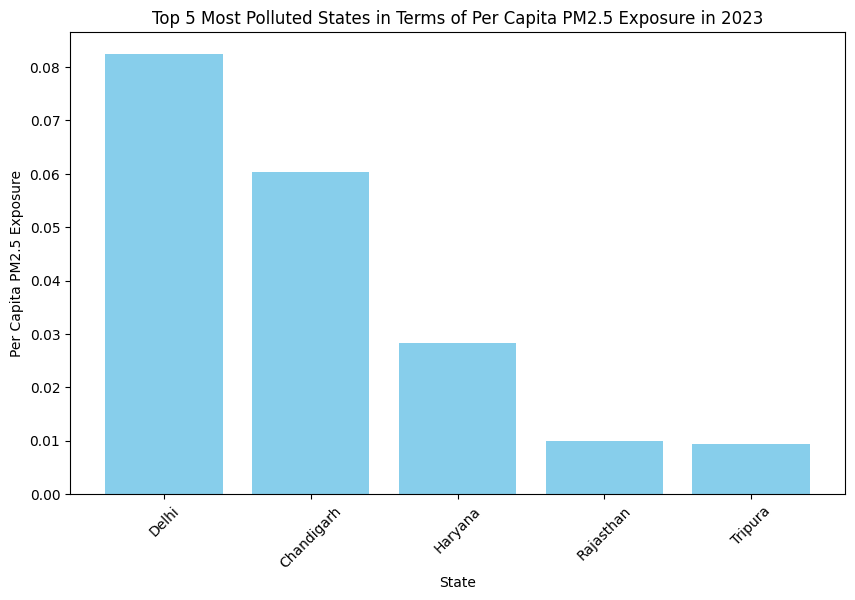

In [166]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted_states['State'], top_5_polluted_states['PM2.5_per_Capita'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure in 2023')
plt.xticks(rotation=45)
plt.show()

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
* X-axis: Population density (people per square kilometer).
* Y-axis: Average PM2.5 concentration.
* Use a scatter plot to show the relationship, where each point represents a state.

In [167]:
average_pm25_state = pollution_df.groupby('state')['PM2.5'].mean().reset_index()
average_pm25_state.columns = ['State', 'Average_PM2.5']

average_pm25_state['State'] = average_pm25_state['State'].str.strip()
state_data['State'] = state_data['State'].str.strip()

merged_df = pd.merge(average_pm25_state, state_data, on='State')
merged_df['Population_Density'] = merged_df['Population'] / merged_df['Area (km2)']


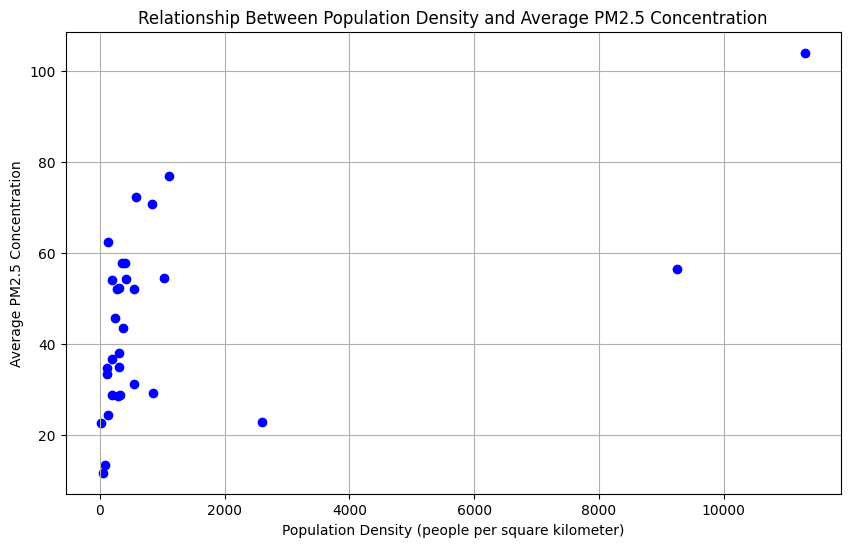

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Population_Density'], merged_df['Average_PM2.5'], color='blue')
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and Average PM2.5 Concentration')
plt.grid(True)
plt.show()

In [169]:
correlation = merged_df['Population_Density'].corr(merged_df['Average_PM2.5'])
print(f"Correlation between population density and average PM2.5 concentration: {correlation:.2f}")

Correlation between population density and average PM2.5 concentration: 0.51


# Area Based

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
* X-axis: States.
* Y-axis: PM2.5 concentration per square kilometer.
* Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km

In [145]:
state_cum_pm25 = pollution_df.groupby('state')['PM2.5'].sum().reset_index()
state_cum_pm25.columns = ['State', 'Total_PM2.5']

merged_df = pd.merge(state_cum_pm25, state_data, on='State')
merged_df['PM2.5_per_SqKm'] = merged_df['Total_PM2.5'] / merged_df['Area (km2)']

highest_pm25_state = merged_df.loc[merged_df['PM2.5_per_SqKm'].idxmax()]
print(f"State with the highest PM2.5 concentration per square kilometer: {highest_pm25_state['State']}")

State with the highest PM2.5 concentration per square kilometer: Delhi


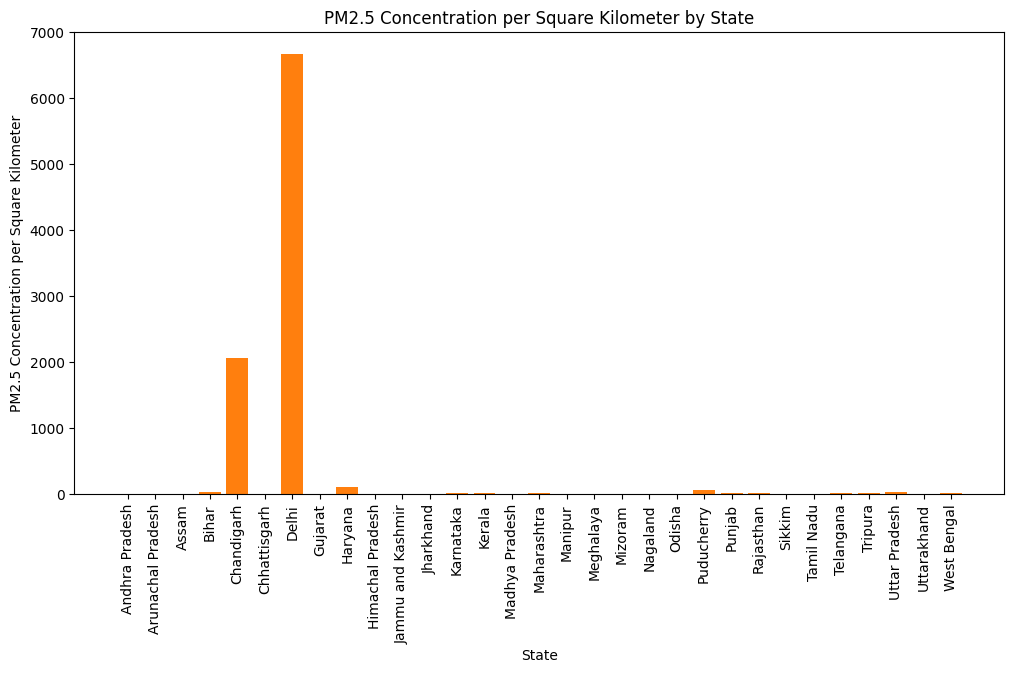

In [146]:
plt.figure(figsize=(12, 6))
plt.bar(merged_df['State'], merged_df['PM2.5_per_SqKm'], color='C1')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per Square Kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.show()

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

In [334]:
station_counts = pollution_df.groupby('state')['station'].nunique().reset_index()
station_counts.columns = ['State', 'Stations']

merged_df = pd.merge(station_counts, state_data, on='State')

merged_df['Stations_per_SqKm'] = merged_df['Stations'] / merged_df['Area (km2)']

highest_density_state = merged_df.loc[merged_df['Stations_per_SqKm'].idxmax()]
print(f"State with the highest density of monitoring stations: {highest_density_state['State']}")

State with the highest density of monitoring stations: Delhi


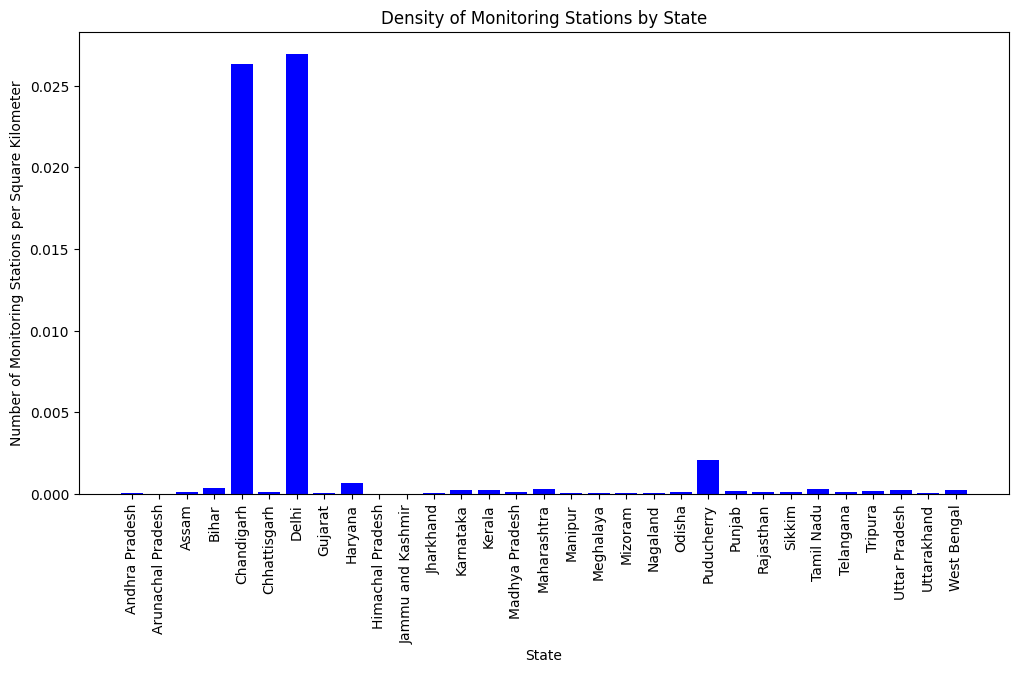

In [327]:
plt.figure(figsize=(12, 6))
plt.bar(merged_df['State'], merged_df['Stations_per_SqKm'], color='b')
plt.xlabel('State')
plt.ylabel('Number of Monitoring Stations per Square Kilometer')
plt.title('Density of Monitoring Stations by State')
plt.xticks(rotation=90)
plt.show()

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [162]:
df_2021 = pollution_df[pollution_df['Timestamp'].dt.year == 2021]

maharashtra_pm25 = df_2021[df_2021['state'] == 'Maharashtra']['PM2.5'].mean()
madhya_pradesh_pm25 = df_2021[df_2021['state'] == 'Madhya Pradesh']['PM2.5'].mean()

print(f"Average PM2.5 level in Maharashtra (2021): {maharashtra_pm25:.2f} µg/m³")
print(f"Average PM2.5 level in Madhya Pradesh (2021): {madhya_pradesh_pm25:.2f} µg/m³")

Average PM2.5 level in Maharashtra (2021): 46.44 µg/m³
Average PM2.5 level in Madhya Pradesh (2021): 47.10 µg/m³


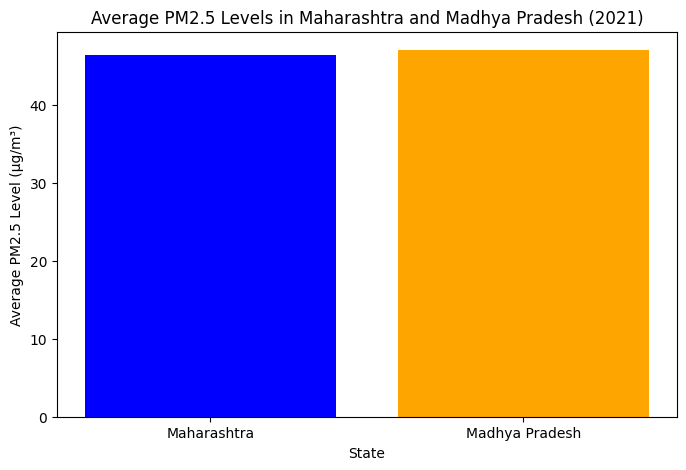

In [148]:
states = ['Maharashtra', 'Madhya Pradesh']
pm25_levels = [maharashtra_pm25, madhya_pradesh_pm25]

plt.figure(figsize=(8, 5))
plt.bar(states, pm25_levels, color=['blue', 'orange'])
plt.xlabel('State')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.title('Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)')
plt.show()

In [156]:
state_data['Population_Density'] = state_data['Population'] / state_data['Area (km2)']
maharashtra_density = state_data[state_data['State'] == 'Maharashtra']['Population_Density'].values[0]
madhya_pradesh_density = state_data[state_data['State'] == 'Madhya Pradesh']['Population_Density'].values[0]

print(f"Population density in Maharashtra: {maharashtra_density:.2f} people per square kilometer")
print(f"Population density in Madhya Pradesh: {madhya_pradesh_density:.2f} people per square kilometer")

Population density in Maharashtra: 365.19 people per square kilometer
Population density in Madhya Pradesh: 235.61 people per square kilometer


**MP has less population density still it has higher average PM2.5 value. Possible reasons can be:**

Industrial Activities: Madhya Pradesh has several industrial areas that emit pollutants, including PM2.5. Industries such as cement, power plants, and mining can significantly contribute to air pollution.

Agricultural Practices: The burning of agricultural residues, especially during the post-harvest season, releases a substantial amount of particulate matter into the air.

# Funding Based

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [319]:
pollution_df['Timestamp'] = pd.to_datetime(pollution_df['Timestamp'])
df_2021 = pollution_df[pollution_df['Timestamp'].dt.year == 2021]

ncap_funding['Amount released during FY 2021-22'] = ncap_funding['Amount released during FY 2021-22'].replace('-', pd.NA)

merged_data = df_2021.merge(ncap_funding, left_on='state', right_on='State', how='left')
merged_data['Received_Funding'] = merged_data['Amount released during FY 2021-22'].notna()

average_pm25 = merged_data.groupby('Received_Funding')['PM2.5'].mean().reset_index()
average_pm25

,Received_Funding,PM2.5
0,False,60.326211
1,True,58.824280


**We can conclude that the states which have recieved NCAP Funding have lower average value of PM2.5 value in year 2021.**

2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

In [ ]:
air_quality_data = pd.read_csv('Data1.csv')
funding_data = pd.read_csv('NCAP_Funding.csv')

air_quality_data['Timestamp'] = pd.to_datetime(air_quality_data['Timestamp'])

In [316]:
assam_air_quality = pollution_df[pollution_df['state'] == 'Assam']
assam_funding = ncap_funding[ncap_funding['State'] == 'Assam']

assam_air_quality['MonthYear'] = assam_air_quality['Timestamp'].dt.to_period('M')
monthly_pm25 = assam_air_quality.groupby('MonthYear')['PM2.5'].mean().reset_index()
monthly_pm25['MonthYear'] = monthly_pm25['MonthYear'].dt.to_timestamp()

funding_years = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']
assam_funding[funding_years] = assam_funding[funding_years].replace('-', pd.NA).fillna(0).astype(float)

assam_funding_sum = assam_funding[funding_years].sum(axis=0)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\3140345605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_air_quality['MonthYear'] = assam_air_quality['Timestamp'].dt.to_period('M')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\3140345605.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_funding[funding_years] = assam_funding[funding_years].replace('-', pd.NA).fillna(0).astype(float)


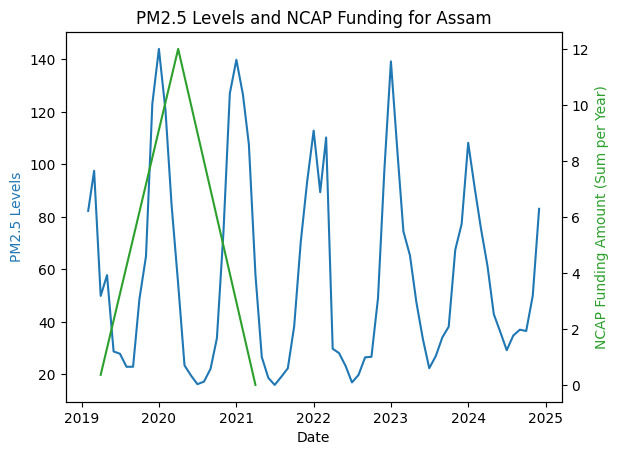

In [317]:
fig, ax1 = plt.subplots()

ax1.plot(monthly_pm25['MonthYear'], monthly_pm25['PM2.5'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(['2019-04-01', '2020-04-01', '2021-04-01']), assam_funding_sum, color='tab:green')
ax2.set_ylabel('NCAP Funding Amount (Sum per Year)', color='tab:green')

plt.title('PM2.5 Levels and NCAP Funding for Assam')
plt.show()


**The increase in funding has not affected the genernl trend of the PM2.5 in Assam.**

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

In [ ]:
funding_df = ncap_funding.copy()
funding_cols = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']

for col in funding_cols:
    funding_df[col] = funding_df[col].replace('-', np.nan)
    funding_df[col] = funding_df[col].astype(float)
    funding_df[col].fillna(funding_df[col].mean(), inplace=True)

funding_df['Average Funding'] = funding_df[funding_cols].mean(axis=1)

state_avg_funding = funding_df.groupby('State')['Average Funding'].mean().reset_index()

merged_df = pd.merge(state_avg_funding, state_data, on='State')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\2036017881.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  funding_df[col].fillna(funding_df[col].mean(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\2036017881.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

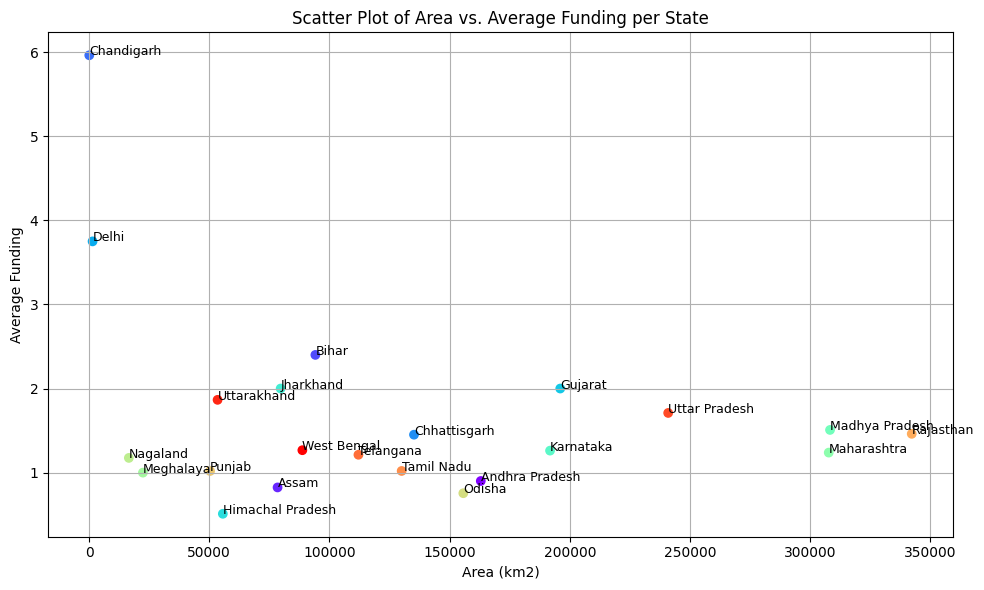

In [231]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_df['Area (km2)'], merged_df['Average Funding'], c=range(len(merged_df)), cmap='rainbow')

for i, state in enumerate(merged_df['State']):
    plt.text(merged_df['Area (km2)'][i], merged_df['Average Funding'][i], state, fontsize=9)

plt.xlabel('Area (km2)')
plt.ylabel('Average Funding')
plt.title('Scatter Plot of Area vs. Average Funding per State')
plt.grid(True)
plt.tight_layout()
plt.show()

# Miscellaneous Questions

1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [244]:
data_2023 = pollution_df[pollution_df['Timestamp'].dt.year == 2023]
city_pm25_avg = data_2023.groupby('city')['PM2.5'].mean().reset_index()

most_polluted_city = city_pm25_avg.loc[city_pm25_avg['PM2.5'].idxmax()]['city']

polluted_city_data = data_2023[data_2023['city'] == most_polluted_city]

polluted_city_data['Date'] = polluted_city_data['Timestamp'].dt.date
hazardous_days = polluted_city_data[polluted_city_data['PM2.5'] > 300].groupby('Date').size().count()

total_days = polluted_city_data['Date'].nunique()
percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most Polluted City: {most_polluted_city}, Hazardous Days: {percentage_hazardous_days:.2f}%\n")

Most Polluted City: Darbhanga, Hazardous Days: 0.82%



C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\4226438450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polluted_city_data['Date'] = polluted_city_data['Timestamp'].dt.date


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\2315579339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\2315579339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Day'] = delhi_data['Timestamp'].dt.day


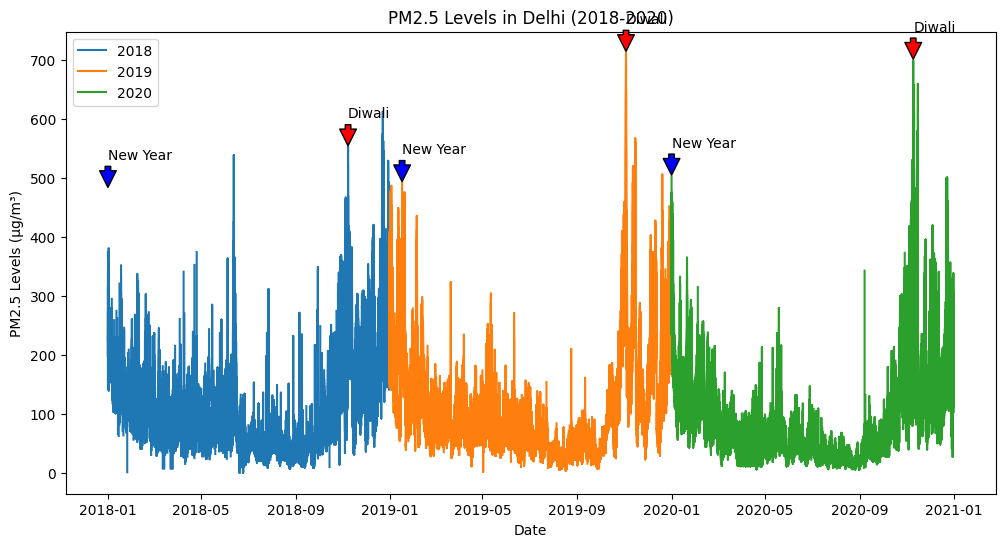

In [260]:
delhi_data = pollution_df[(pollution_df['city'] == 'Delhi') & (pollution_df['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Day'] = delhi_data['Timestamp'].dt.day

diwali_months = [10, 11]
new_year_month = 1

plt.figure(figsize=(12, 6))

for year in [2018, 2019, 2020]:
    yearly_data = delhi_data[delhi_data['Timestamp'].dt.year == year]
    plt.plot(yearly_data['Timestamp'], yearly_data['PM2.5'], label=f'{year}')

    diwali_data = yearly_data[yearly_data['Month'].isin(diwali_months)]
    if not diwali_data.empty:
        diwali_peak = diwali_data.loc[diwali_data['PM2.5'].idxmax()]
        plt.annotate('Diwali', xy=(diwali_peak['Timestamp'], diwali_peak['PM2.5']),
                     xytext=(diwali_peak['Timestamp'], diwali_peak['PM2.5'] + 50),
                     arrowprops=dict(facecolor='red', shrink=0.05))

    new_year_data = yearly_data[yearly_data['Month'] == new_year_month]
    if not new_year_data.empty:
        new_year_peak = new_year_data.loc[new_year_data['PM2.5'].idxmax()]
        plt.annotate('New Year', xy=(new_year_peak['Timestamp'], new_year_peak['PM2.5']),
                     xytext=(new_year_peak['Timestamp'], new_year_peak['PM2.5'] + 50),
                     arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('PM2.5 Levels in Delhi (2018-2020)')
plt.legend()
plt.show()

3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends

In [259]:
max_funded_state = ncap_funding.groupby("State")["Amount released during FY 2020-21"].sum().idxmax()

state_data = pollution_df[pollution_df['state'] == max_funded_state]

state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])
state_data['Year'] = state_data['Timestamp'].dt.year

yearly_avg_pm25 = state_data.groupby('Year')['PM2.5'].mean().reset_index()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\1965869191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25316\1965869191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Year'] = state_data['Timestamp'].dt.year


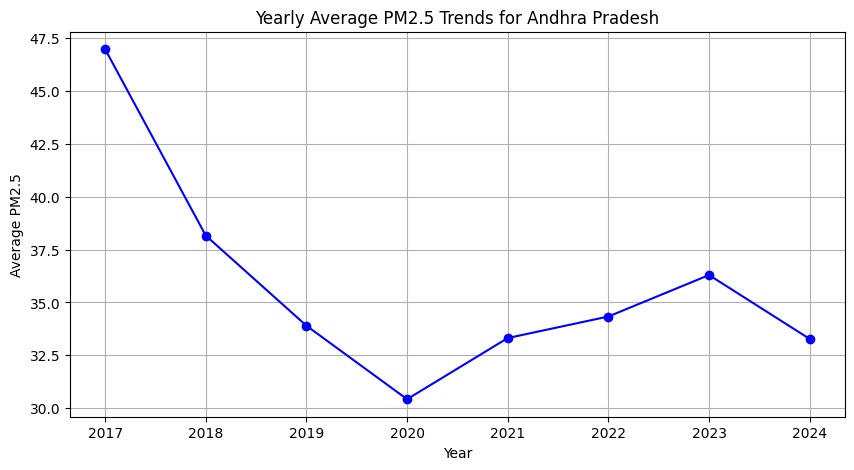

In [318]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_pm25['Year'], yearly_avg_pm25['PM2.5'], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.title(f'Yearly Average PM2.5 Trends for {max_funded_state}')
plt.grid(True)
plt.show()

**We can clearly see that even Andra Pradesh had the highest NCAP Funding in 2020, still the PM 2.5 vlues have got up.**

4. Draw the map of India and plot the sensor locations on the map.

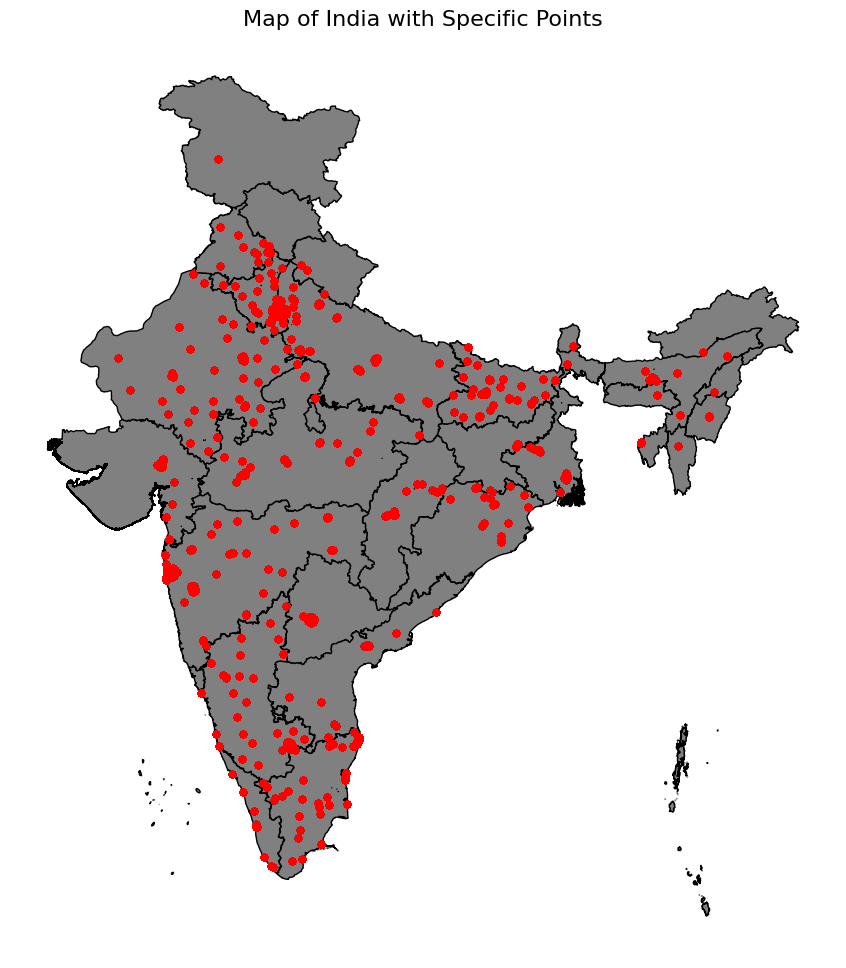

In [ ]:
df_position = pollution_df[['latitude','longitude']]
india_map = gpd.read_file('states_india.geojson')

fig, ax = plt.subplots(figsize=(12, 12))

india_map.plot(ax=ax, edgecolor='black', facecolor='grey')
ax.scatter(df_position['longitude'], df_position['latitude'], color='red', s=20)

ax.axis('off')
plt.title('Map of India with Specific Points', fontsize=16)
plt.show()

# Tell us something new 

1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 

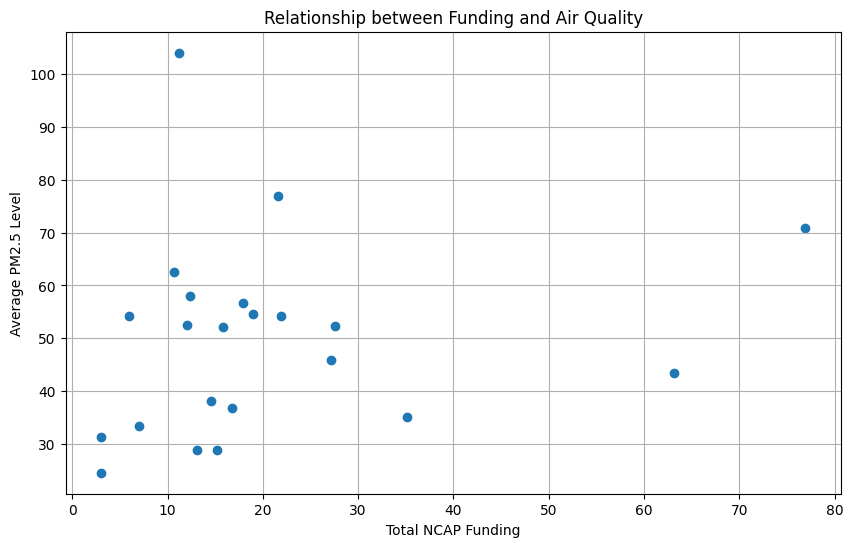

In [369]:
funding_by_state = ncap_funding.groupby('State')['Total fund released'].sum()
avg_pm25_by_state = pollution_df.groupby('state')['PM2.5'].mean()
merged_data = pd.merge(funding_by_state, avg_pm25_by_state, left_index=True, right_index=True)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total fund released'], merged_data['PM2.5'])
plt.xlabel('Total NCAP Funding')
plt.ylabel('Average PM2.5 Level')
plt.title('Relationship between Funding and Air Quality')
plt.grid(True)
plt.show()

**Conclusions**
* Funding alone is not a direct determinant of air quality improvement. Other factors such as policy implementation, industrial emissions, and geographic conditions play a role.
* Some high-pollution states may require better execution of air quality control measures rather than just higher funding.
* Low pollution in certain low-funded states suggests natural or administrative advantages, such as fewer pollution sources or strong regulatory frameworks.

**Suggestion as a policy maker**

**Focus on Effective Implementation, Not Just Funding**
The lack of a clear correlation between funding and air quality suggests that efficient use of resources is more important than just increasing budgets.
Ensure that funds are spent on impactful measures like cleaner transportation, industrial pollution control, and better monitoring infrastructure.